------------------------------------------------------------------------------------------------------------------------------------------------------

## AVERAGE WAVEFORMS NOTEBOOK


##### PLEASE! When you are done with the tutorial, move to the ```notebooks``` folder to start your own analysis 
 In this way, you will be able to keep the tutorial as a reference for future use (or others to use it).

------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import sys; sys.path.insert(0, '../'); from lib import *;
figure_features()

Welcome to JupyROOT 6.28/00
You have latex installed!. Applying default configuration (tex=True)


In [2]:
# Set options for general visualitation
OPT  = {
    "MICRO_SEC":   True,                # Time in microseconds (True/False)
    "NORM":        False,               # Runs can be displayed normalised (True/False)
    "ALIGN":       True,                # Aligns waveforms in peaktime (True/False)
    "LOGY":        False,               # Runs can be displayed in logy (True/False)
    "SHOW_AVE":    "",                  # If computed, vis will show average (AveWvf,AveWvfSPE,etc.)
    "SHOW_PARAM":  False,               # Print terminal information (True/False)
    "CHARGE_KEY":  "ChargeAveRange",    # Select charge info to be displayed. Default: "ChargeAveRange" (if computed)
    "PEAK_FINDER": False,               # Finds possible peaks in the window (True/False)
    "LEGEND":      True,                # Shows plot legend (True/False)
    "SHOW":        True
    }

In [3]:
info           = read_input_file("TUTORIAL") # Read input file
calib_runs     = [ 1]                        # Calibration runs
laser_runs     = [ 9]                        # Laser runs
alpha_runs     = [25]                        # Alpha runs
muons_runs     = [29]                        # Muons runs
noise_runs     = [128]                       # Noise runs

all_runs = calib_runs + laser_runs + alpha_runs + muons_runs + noise_runs
channels = [0,6]

In [4]:
my_runs_calib = load_npy(np.asarray(calib_runs).astype(int),np.asarray(channels).astype(int),preset="EVA",info=info,compressed=True)
my_runs_laser = load_npy(np.asarray(laser_runs).astype(int),np.asarray(channels).astype(int),preset="EVA",info=info,compressed=True)
my_runs_alpha = load_npy(np.asarray(alpha_runs).astype(int),np.asarray(channels).astype(int),preset="EVA",info=info,compressed=True)
my_runs_muons = load_npy(np.asarray(muons_runs).astype(int),np.asarray(channels).astype(int),preset="EVA",info=info,compressed=True)
my_runs_noise = load_npy(np.asarray(noise_runs).astype(int),np.asarray(channels).astype(int),preset="EVA",info=info,compressed=True)

time_wvf = np.arange(len(my_runs_calib[calib_runs[0]][channels[0]]["AnaAveWvf"][0]))*4e-9
time_all = np.arange(len(my_runs_calib[calib_runs[0]][channels[0]]["TimeStamp"]))*4e-9

my_runs = {"Calibration":my_runs_calib[calib_runs[0]], "Alpha": my_runs_alpha[alpha_runs[0]], "Laser": my_runs_laser[laser_runs[0]], "Muons": my_runs_muons[muons_runs[0]], "Noise": my_runs_noise[noise_runs[0]]}

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!



In [5]:
my_runs_alpha = load_npy(np.asarray(alpha_runs).astype(int),np.asarray(channels).astype(int),preset="ALL",info=info,compressed=True)
cut_dict = {'cut_df': [True,[[["0"],"AnaPeakTime","bigger_than",1000,False]]], 'cut_lin_rel': [False,[]], 'cut_peak_finder': [False,[]]}
label, my_runs_alpha = cut_selector(my_runs_alpha, {'runs': ['25'], 'input_file': ['TUTORIAL'], 'filter':cut_dict,'debug': True, 'channels': ['0']}, debug=True)
average_wvfs(my_runs_alpha, key="RawADC", label="Ana",cut_label="Pedestal", centering="NONE", debug=True)

load_npy --> DONE!

load_npy --> DONE!

---- LET'S CUT! ----
... Cutting events for run 25 channel 0 with AnaPeakTime bigger_than 1000.00 ...
Nº of selected events from total events: 9890 (100.00%)
-> Found label Raw form key RawADC
Calculating average wvf with cuts
Computing ANA wvfs from RAW
Averaging wvf: AnaAveWvfPedestal
-> Found label Raw form key RawADC
Calculating average wvf with cuts
Computing ANA wvfs from RAW
Averaging wvf: AnaAveWvfPedestal
Average waveform calculated


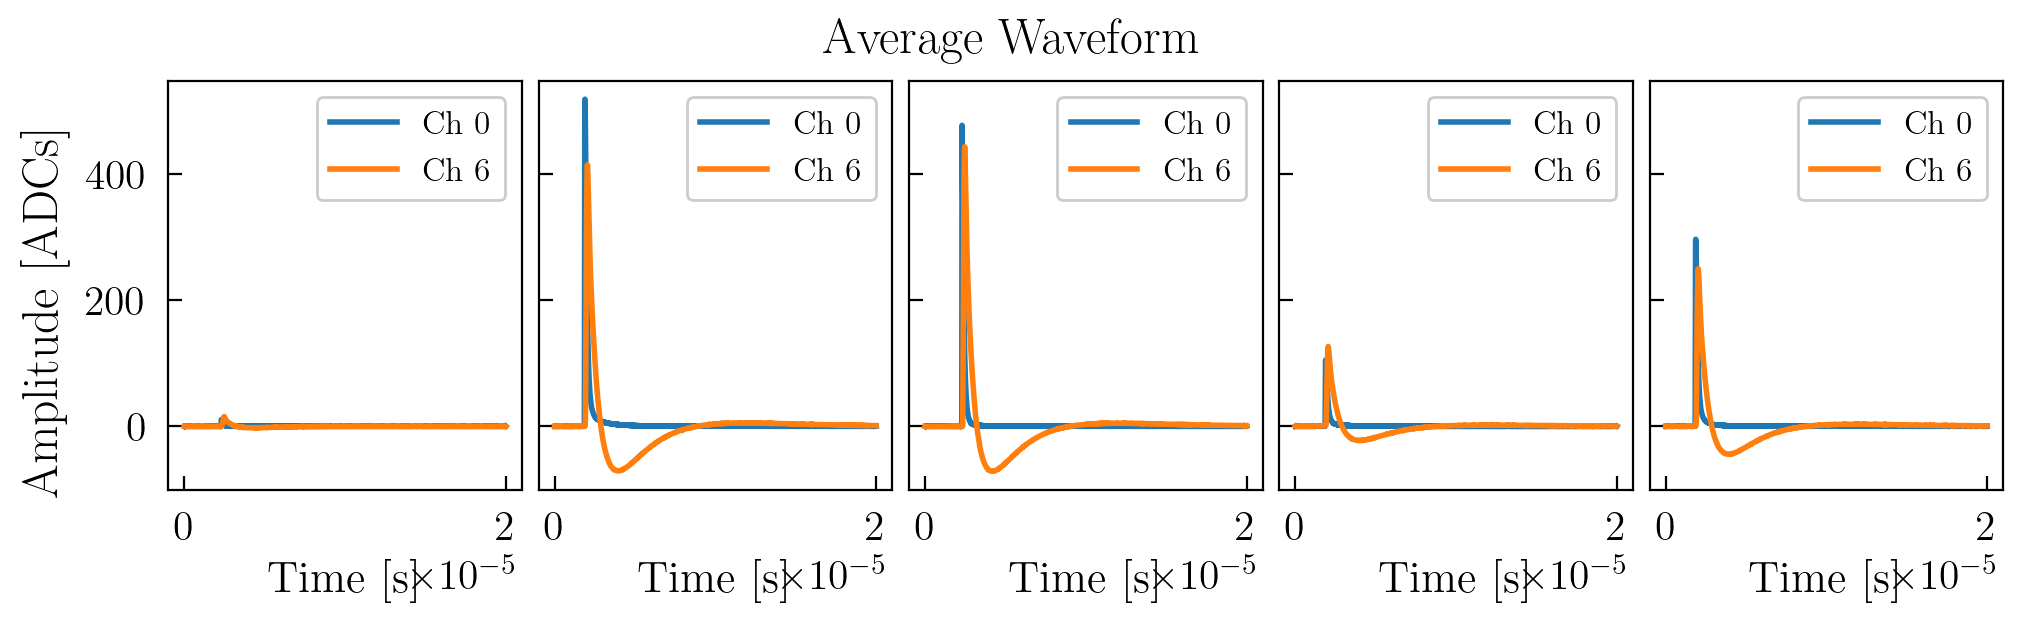

In [6]:
key = "AnaAveWvf"

# nch=len(channels); 
nrun=len(all_runs); ncol=int((nrun+1)/2); nrow=int((nrun)/2); axs = []

fig, axs = plt.subplots(dpi=200,ncols=len(all_runs),figsize=[10,3],sharey=True)
plt.suptitle("Average Waveform")
fig.supylabel("Amplitude [ADCs]")
for r,run in enumerate(my_runs.keys()):
    for c,ch in enumerate(channels):
        AveWvf = my_runs[run][ch][key][0]
        axs[r].plot(time_wvf, AveWvf,label="Ch "+str(ch))
        axs[r].legend()
        axs[r].grid()
        axs[r].set_xlabel("Time [s]")
plt.show()